In [16]:

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import geopandas
import plotly.express as px
import numpy
import seaborn as sns
import os

### Finding out about changes in male and female population in Slovakia
- is the population increasing or decreasing?
- finding out about male/female ratio

In [17]:
def country_query(table,*countries):
    query_str = ""
    if type(countries)==str:
        query_str +="Country == '" + countries +"'"
    else:
        for country in countries:
            query_str += "or Country == '" + country +"'"
        query_str = query_str[2:]


    return table.query(query_str)


### importing both male and female tables

In [18]:
url = "../Data/Annual_population_eurostat(mandatory).csv"
table = pd.read_csv(url)

query = country_query(table,"Slovakia").query("sex == 'T'").sort_values("2024",ascending=False)

display(query.head(5))
male = country_query(table,"Slovakia").query("sex == 'M'").sort_values("2024",ascending=False)
female = country_query(table,"Slovakia").query("sex == 'F'").sort_values("2024",ascending=False)
display(male.head(5))
display(female.head(5))

,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
480,Slovakia,SVK,TOTAL,T,5421349.0,5426252.0,5435343.0,5443120.0,5450421.0,5457873.0,5459781.0,5434712.0,5428792.0,5424687.0
181,Slovakia,SVK,NAT,T,5359583.0,5360412.0,5365648.0,5370237.0,5374305.0,5378937.0,5377706.0,5371646.0,5364540.0,5358701.0
574,Slovakia,SVK,UNK,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2924.0,2905.0,2999.0
364,Slovakia,SVK,STLS,T,1500.0,1499.0,1497.0,1495.0,1495.0,1493.0,1493.0,5.0,5.0,5.0
88,Slovakia,SVK,EU28_FOR,T,47202.0,50440.0,53511.0,55949.0,58308.0,60311.0,NaN,NaN,NaN,NaN


,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
441,Slovakia,SVK,TOTAL,M,2642328.0,2646082.0,2651684.0,2656514.0,2661077.0,2665350.0,2666486.0,2657903.0,2655094.0,2653217.0
150,Slovakia,SVK,NAT,M,2604107.0,2605148.0,2608235.0,2611094.0,2613689.0,2616210.0,2615483.0,2619889.0,2616397.0,2613497.0
543,Slovakia,SVK,UNK,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1710.0,1700.0,1743.0
333,Slovakia,SVK,STLS,M,952.0,951.0,950.0,949.0,949.0,947.0,947.0,2.0,2.0,2.0
58,Slovakia,SVK,EU28_FOR,M,30297.0,32508.0,34580.0,36142.0,37634.0,38908.0,NaN,NaN,NaN,NaN


,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
402,Slovakia,SVK,TOTAL,F,2779021.0,2780170.0,2783659.0,2786606.0,2789344.0,2792523.0,2793295.0,2776809.0,2773698.0,2771470.0
119,Slovakia,SVK,NAT,F,2755476.0,2755264.0,2757413.0,2759143.0,2760616.0,2762727.0,2762223.0,2751757.0,2748143.0,2745204.0
512,Slovakia,SVK,UNK,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1214.0,1205.0,1256.0
302,Slovakia,SVK,STLS,F,548.0,548.0,547.0,546.0,546.0,546.0,546.0,3.0,3.0,3.0
28,Slovakia,SVK,EU28_FOR,F,16905.0,17932.0,18931.0,19807.0,20674.0,21403.0,NaN,NaN,NaN,NaN


### Graph of change of male and female population in Slovakia

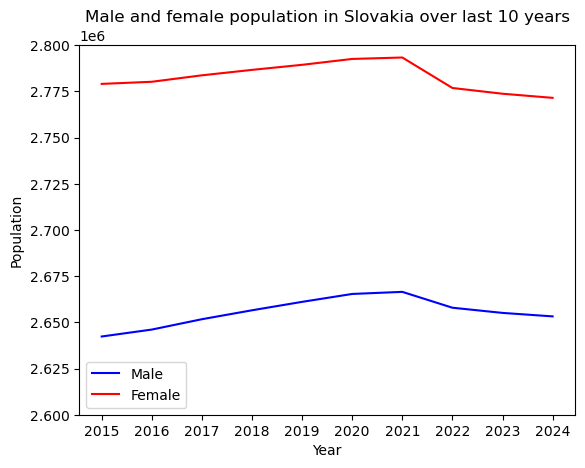

In [19]:
male_pop= []
female_pop = []
for i in range(10):
    male_pop.append(table.iloc[441,i+4])
    female_pop.append(table.iloc[402,i+4])


years = [x for x in range(2015,2025,1)]

figure, axes = plt.subplots()
axes.plot(years,male_pop,label="Male",color="blue")
axes.plot(years,female_pop,label="Female",color="red")
axes.set_ylim(2.6e6,2.8e6)
axes.set_xticks(years)
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Population')
axes.set_title('Male and female population in Slovakia over last 10 years')
pass

### Highest rise/fall in Male and Female population in Slovakia (2015-2024)

In [20]:

max_riseF = 0
max_fallF = 0
rise_yearF = None
fall_yearF = None

for i in range(1, len(female_pop)):
    diff = female_pop[i] - female_pop[i - 1]
    if diff > max_riseF:
        max_riseF = diff
        rise_yearF = i
    if diff < max_fallF:
        max_fallF = diff
        fall_yearF = i

max_riseM = 0
max_fallM = 0
rise_yearM = None
fall_yearM = None

for i in range(1, len(male_pop)):
    diff = male_pop[i] - male_pop[i - 1]
    if diff > max_riseM:
        max_riseM = diff
        rise_yearM = i
    if diff < max_fallM:
        max_fallM = diff
        fall_yearM = i

print(f"Highest female increase: {max_riseF:.0f} between years {2014 + rise_yearF}-{2015 + rise_yearF}")
print(f"Highest female decrease: {max_fallF:.0f} between years {2014 + fall_yearF}-{2015 + fall_yearF}")

print(f"Highest male increase: {max_riseM:.0f} between years {2014 + rise_yearM}-{2015 + rise_yearM}")
print(f"Highest male decrease: {max_fallM:.0f} between years {2014 + fall_yearM}-{2015 + fall_yearM}")

Highest female increase: 3489 between years 2016-2017
Highest female decrease: -16486 between years 2021-2022
Highest male increase: 5602 between years 2016-2017
Highest male decrease: -8583 between years 2021-2022


### Female-Total and Male-Total population ratio

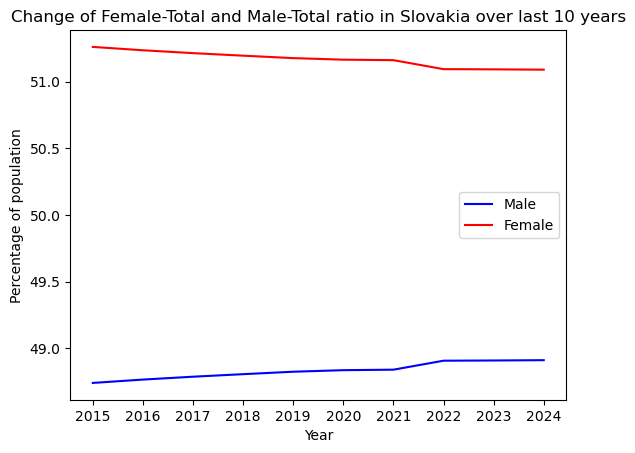

In [21]:
male_perc = []
female_perc = []
for i in range(10):
    male_perc.append(((table.iloc[441,i+4])/(table.iloc[480,i+4]))*100)
    female_perc.append(((table.iloc[402,i+4])/(table.iloc[480,i+4]))*100)

years = [x for x in range(2015,2025,1)]
figure, axes = plt.subplots()
axes.plot(years,male_perc,label="Male",color="blue")
axes.plot(years,female_perc,label="Female",color="red")
axes.set_xticks(years)
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Percentage of population')
axes.set_title('Change of Female-Total and Male-Total ratio in Slovakia over last 10 years')
pass

### Percentual change in Male and Female population over last 10 years

In [22]:
female2015 = table.iloc[402,4]
female2024 = table.iloc[402,13]
male2015 = table.iloc[441,4]
male2024 = table.iloc[441,13]
female_diff = female2024 - female2015
female_diff_perc = round((female_diff/female2015)*100,3)
male_diff = male2024 - male2015
male_diff_perc = round((male_diff/male2015)*100,3)
print(f'Female: {female_diff_perc}%')
print(f'Male: {male_diff_perc}%')

Female: -0.272%
Male: 0.412%


### Rest of the EU

In [23]:
url1 = "../Data/Annual_population_eurostat(mandatory).csv"
table1 = pd.read_csv(url)
display(table1.head(100))

,Country,ISO3,citizen,sex,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Austria,AUT,EU28_FOR,F,288028.0,310759.0,329981.0,348012.0,365125.0,383295.0,NaN,NaN,NaN,NaN
1,Belgium,BEL,EU28_FOR,F,416232.0,428008.0,434889.0,440355.0,448655.0,457258.0,NaN,NaN,NaN,NaN
2,Switzerland,CHE,EU28_FOR,F,594052.0,610566.0,622893.0,630371.0,637330.0,645916.0,NaN,NaN,NaN,NaN
3,Cyprus,CYP,EU28_FOR,F,55730.0,57716.0,57673.0,59787.0,63044.0,62935.0,NaN,NaN,NaN,NaN
4,Czechia,CZE,EU28_FOR,F,72465.0,76736.0,81670.0,86132.0,91296.0,96186.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Czechia,CZE,NAT,F,5164821.0,5162453.0,5157768.0,5166723.0,5165918.0,5172487.0,5102229.0,5092639.0,5089449.0,5080495.0
96,Germany,DEU,NAT,F,37702521.0,37613748.0,37514010.0,37417038.0,37317231.0,37228015.0,37120239.0,36999286.0,36678390.0,36524287.0
97,Denmark,DNK,NAT,F,2637096.0,2640008.0,2649782.0,2655613.0,2657991.0,2660442.0,2668057.0,2673313.0,2673510.0,2673779.0
98,Estonia,EST,NAT,F,603207.0,602421.0,602477.0,602662.0,603557.0,604324.0,604049.0,603138.0,602516.0,601620.0


### Graphs

In [24]:
def male_female_count(country):
    male_pop = []
    female_pop = []

    country_male = table.query("Country == '"+country+"' and sex == 'M' and citizen == 'TOTAL'")
    country_female = table.query("Country == '"+country+"' and sex == 'F' and citizen == 'TOTAL'")

    try:
        for i in range(10):
            male_pop.append(country_male.iloc[0, i+4])
            female_pop.append(country_female.iloc[0, i+4])

        years = [x for x in range(2015, 2025)]

        figure, axes = plt.subplots()
        axes.plot(years, male_pop, label="Male", color="blue")
        axes.plot(years, female_pop, label="Female", color="red")
        axes.set_xticks(years)
        axes.set_xlabel('Year')
        axes.set_ylabel('Population')
        axes.set_title('Male and Female population in ' + country)
        axes.legend()

        dir_name = os.path.join("../Images", country)

        os.makedirs(dir_name, exist_ok=True)

        file_path = os.path.join(dir_name, f"gender_pop_{country.lower()}.png")
        figure.savefig(file_path)
        plt.close(figure)

    except Exception as e:
        print(f"Error {country}: {e}")

for country in table.Country.unique():
    male_female_count(country)




### Gender Ratio

In [ ]:
def gender_ratio(country):
    male_perc = []
    female_perc = []

    country_male = table.query("Country == '"+country+"' and sex == 'M' and citizen == 'TOTAL'")
    country_female = table.query("Country == '"+country+"' and sex == 'F' and citizen == 'TOTAL'")
    country_total = table.query("Country == '"+country+"' and sex == 'T' and citizen == 'TOTAL'")

    try:
        for i in range(10):
            male_val = country_male.iloc[0, i+4]
            female_val = country_female.iloc[0, i+4]
            total_val = country_total.iloc[0, i+4]

            if pd.notnull(male_val) and pd.notnull(female_val) and pd.notnull(total_val) and total_val != 0:
                ratio1 = (male_val / total_val) * 100
                ratio2 = (female_val / total_val) * 100
            else:
                ratio1 = None
                ratio2 = None

            male_perc.append(ratio1)
            female_perc.append(ratio2)

        years = [x for x in range(2015, 2025)]

        figure, axes = plt.subplots()
        axes.plot(years, male_perc, label="Male as % of Total", color="blue")
        axes.plot(years, female_perc, label="Female as % of Total", color="red")
        axes.set_xticks(years)

        axes.set_xlabel('Year')
        axes.set_ylabel('Percentage of population')
        axes.set_title('Gender Population Ratio in ' + country)
        axes.legend()

        dir_name = os.path.join("../Images/Countries", country)
        os.makedirs(dir_name, exist_ok=True)

        file_path = os.path.join(dir_name, f"gender_ratio_{country.lower()}.png")
        figure.savefig(f'{file_path}')
        plt.close(figure)

    except Exception as e:
        print(f"Error {country}: {e}")

for country in table.Country.unique():
    gender_ratio(country)
